# **Data Scientists Test - Topic: Diabetes**

Elaborated by Lucy Jiménez

## **Overview**

### **Context**

The dataset [Diabetes 130-US hospitals for years 1999-2008](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#)
 has 3 different outputs:
1. No readmission;
2. A readmission in less than 30 days (this situation is not good, because maybe
your treatment was not appropriate);
3. A readmission in more than 30 days (this one is not so good as well the last
one, however, the reason could be the state of the patient.

**Dataset Information**


The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

### **Objective**
To classify a patient-hospital outcome or to cluster them aiming at finding patterns that give a distinct insight.

### **Outline**
The notebook is structured as follows:

1. Loading and inspecting data
2. Data cleaning and Exploratory Data Analysis - EDA
3. Clustering
4. Conclusions 

## **1. Loading and inspecting the data**

* Import libraries and set parameters.

In [1]:
# Import the libraries to start with.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Show plots inline in a notebook.
%matplotlib inline

# Don’t print Future Warning
warnings.filterwarnings("ignore", category=FutureWarning)

### **Read data**

* Load and inspect diabetic dataset.

In [3]:
# Read data from a CSV into a dataframe.
df_data = pd.read_csv("https://raw.githubusercontent.com/LucyJimenez/ds_test/main/diabetic_data.csv")

In [4]:
# Show the first 3 rows in a dataframe.
df_data.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [5]:
# Print some basic information about the dataframe.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

We can see all the features that describes the patients and the hostpital outcome of our interest (readmitted). We have different data types and there are no null values.

In [6]:
# Show some basic statistics for numeric columns.
df_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


* Load and inspect IDs mapping dataset.

In [7]:
# Read data from a CSV into a dataframe.
df_mapping = pd.read_csv("https://raw.githubusercontent.com/LucyJimenez/ds_test/main/IDs_mapping.csv")

In [8]:
# Show a random sample of 3 rows in a dataframe.
df_mapping.sample(3)

,admission_type_id,description
60,20,Not Mapped
64,24,Born outside this hospital
52,11,Normal Delivery


In [9]:
# Print some basic information about the dataframe.
df_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
admission_type_id    65 non-null object
description          62 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


We can see there are two null values for `admission_type_id` column and 5 null values for description collumn. Also, the `admission_type_id` column contains object data type.

## **2. Data cleaning and Exploratory Data Analysis - EDA**



In [10]:
# Replace all ? values by NAN.
df_data.replace({'?': np.NAN},inplace=True)

In [11]:
# Check the change after replace all ? values
df_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
# Inspect duplicated values in the dataset.
df_data.duplicated().sum()

0

In [13]:
# Check for missing values.
df_data.isnull().mean()*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

Some feautures such as `weight`, `payer_code`, and `medical_specialty` have missing values.

Now lets see how many unique values are for each feature.

In [14]:
for i in df_data.columns:
    print("{} \t {}".format(i, df_data[i].nunique()))

encounter_id 	 101766
patient_nbr 	 71518
race 	 5
gender 	 3
age 	 10
weight 	 9
admission_type_id 	 8
discharge_disposition_id 	 26
admission_source_id 	 17
time_in_hospital 	 14
payer_code 	 17
medical_specialty 	 72
num_lab_procedures 	 118
num_procedures 	 7
num_medications 	 75
number_outpatient 	 39
number_emergency 	 33
number_inpatient 	 21
diag_1 	 716
diag_2 	 748
diag_3 	 789
number_diagnoses 	 16
max_glu_serum 	 4
A1Cresult 	 4
metformin 	 4
repaglinide 	 4
nateglinide 	 4
chlorpropamide 	 4
glimepiride 	 4
acetohexamide 	 2
glipizide 	 4
glyburide 	 4
tolbutamide 	 2
pioglitazone 	 4
rosiglitazone 	 4
acarbose 	 4
miglitol 	 4
troglitazone 	 2
tolazamide 	 3
examide 	 1
citoglipton 	 1
insulin 	 4
glyburide-metformin 	 4
glipizide-metformin 	 2
glimepiride-pioglitazone 	 2
metformin-rosiglitazone 	 2
metformin-pioglitazone 	 2
change 	 2
diabetesMed 	 2
readmitted 	 3


Let's review the values of columns that only have a unique value.

In [15]:
df_data['examide'].unique()

array(['No'], dtype=object)

In [16]:
df_data['citoglipton'].unique()

array(['No'], dtype=object)

We will remove columns that have missing values or have a single value.

In [17]:
df_data.drop(['weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'encounter_id', 'examide', 'citoglipton'],
             axis=1,
             inplace=True)

### **Mapping data from admission type, discharge disposition and admission source into the main dataset**

In [18]:
df_mapping.head(20)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


Apparently there are several tables in this dataset. We will search for the word description on the `description` colummn and unique values for column `admission_type_id` to find the table headers.

In [19]:
df_mapping[df_mapping['description'] == 'description']

,admission_type_id,description
9,discharge_disposition_id,description
41,admission_source_id,description


In [20]:
df_mapping.admission_type_id.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', nan,
       'discharge_disposition_id', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '30', '27', '28', '29', 'admission_source_id'], dtype=object)

This dataset contains 3 different tables. We are going to separate them to, later, make the corresponding mapping to the main data set.

We will use the position of the names of the headers of each table and then change the data type for column `_id`.

In [21]:
df_admission_type_id	= df_mapping[:8]
df_admission_type_id['admission_type_id'] = pd.to_numeric(df_admission_type_id['admission_type_id'])
df_admission_type_id

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


Let's group together some of the categories of admission type.

In [22]:
df_admission_type_id['description'].replace({'Urgent': 'Emergency', 
                                             np.NaN: 'Not Available', 
                                             'Not Mapped': 'Not Available'}, inplace=True)
df_admission_type_id

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,admission_type_id,description
0,1,Emergency
1,2,Emergency
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,Not Available
6,7,Trauma Center
7,8,Not Available


In [23]:
df_discharge_disposition_id	= df_mapping[10:40].rename(columns = {'admission_type_id':'discharge_disposition_id'})
df_discharge_disposition_id['discharge_disposition_id'] = pd.to_numeric(df_discharge_disposition_id['discharge_disposition_id'])
df_discharge_disposition_id

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


Let's group together some of the categories of discharge disposition.

In [24]:
df_discharge_disposition_id['description'].replace({'Discharged/transferred to another short term hospital': 'Transferred', 
                                                    'Discharged/transferred to SNF': 'Transferred', 
                                                    'Discharged/transferred to ICF': 'Transferred', 
                                                    'Discharged/transferred to another type of inpatient care institution': 'Transferred', 
                                                    'Discharged/transferred to home with home health service': 'Discharged to home', 
                                                    'Left AMA': 'Discharged to home', 
                                                    'Discharged/transferred to home under care of Home IV provider': 'Discharged to home', 
                                                    'Admitted as an inpatient to this hospital': 'Transferred', 
                                                    'Neonate discharged to another hospital for neonatal aftercare': 'Transferred', 
                                                    'Expired': 'Dead', 
                                                    'Still patient or expected to return for outpatient services': 'Transferred', 
                                                    'Hospice / home': 'Discharged to home', 
                                                    'Hospice / medical facility': 'Transferred', 
                                                    'Discharged/transferred within this institution to Medicare approved swing bed': 'Transferred', 
                                                    'Discharged/transferred/referred another institution for outpatient services': 'Transferred', 
                                                    'Discharged/transferred/referred to this institution for outpatient services': 'Transferred', 
                                                    np.NAN: 'Transferred', 
                                                    'Expired at home. Medicaid only, hospice.': 'Dead', 
                                                    'Expired in a medical facility. Medicaid only, hospice.': 'Dead', 
                                                    'Expired, place unknown. Medicaid only, hospice.': 'Dead', 
                                                    'Discharged/transferred to another rehab fac including rehab units of a hospital .': 'Transferred', 
                                                    'Discharged/transferred to a long term care hospital.': 'Transferred', 
                                                    'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.': 'Transferred', 
                                                    'Not Mapped': 'Other', 
                                                    'Unknown/Invalid': 'Transferred', 
                                                    'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere': 'Transferred', 
                                                    'Discharged/transferred to a federal health care facility.': 'Transferred', 
                                                    'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital': 'Transferred', 
                                                    'Discharged/transferred to a Critical Access Hospital (CAH).': 'Transferred'}, inplace=True)
df_discharge_disposition_id

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Transferred
12,3,Transferred
13,4,Transferred
14,5,Transferred
15,6,Discharged to home
16,7,Discharged to home
17,8,Discharged to home
18,9,Transferred
19,10,Transferred


In [25]:
df_admission_source_id	= df_mapping[42:].rename(columns = {'admission_type_id':'admission_source_id'})
df_admission_source_id['admission_source_id'] = pd.to_numeric(df_admission_source_id['admission_source_id'])
df_admission_source_id

,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


Let's group together some of the categories of admission source.

In [26]:
df_admission_source_id['description'].replace({' Physician Referral': 'Referral', 
                                               'Clinic Referral': 'Referral', 
                                               'HMO Referral': 'Referral', 
                                               'Transfer from a hospital': 'Transfer', 
                                               ' Transfer from a Skilled Nursing Facility (SNF)': 'Transfer', 
                                               ' Transfer from another health care facility': 'Transfer', 
                                               ' Emergency Room': 'Emergency Room', 
                                               ' Court/Law Enforcement': 'Other', 
                                               ' Not Available': 'Other', 
                                               ' Transfer from critial access hospital': 'Transfer',
                                               'Normal Delivery': 'Newborn',
                                               ' Premature Delivery': 'Newborn',
                                               ' Sick Baby': 'Newborn',
                                               ' Extramural Birth': 'Newborn',
                                               'Not Available': 'Other',
                                               np.NAN: 'Other',
                                               ' Transfer From Another Home Health Agency': 'Transfer',
                                               'Readmission to Same Home Health Agency': 'Transfer',
                                               ' Not Mapped': 'Other',
                                               'Unknown/Invalid': 'Other',
                                               ' Transfer from hospital inpt/same fac reslt in a sep claim': 'Transfer',
                                               ' Born inside this hospital': 'Newborn',
                                               ' Born outside this hospital': 'Newborn',
                                               ' Transfer from Ambulatory Surgery Center': 'Transfer',
                                               'Transfer from Hospice': 'Transfer'}, inplace=True)
df_admission_source_id

,admission_source_id,description
42,1,Referral
43,2,Referral
44,3,Referral
45,4,Transfer
46,5,Transfer
47,6,Transfer
48,7,Emergency Room
49,8,Other
50,9,Other
51,10,Transfer


We now have 3 tables corresponding to admission_type, discharge_disposition, and admission_source description ready to map in the main dataset.

Let's map the data of admission_type, discharge_disposition and admission_source into the main dataset.

In [27]:
df_data = df_data.merge(df_admission_type_id, how='left', on='admission_type_id')
df_data = df_data.rename(columns = {'description':'description_admission_type'})

In [28]:
df_data = df_data.merge(df_discharge_disposition_id, how='left', on='discharge_disposition_id')
df_data = df_data.rename(columns = {'description':'description_discharge_disposition'})

In [29]:
df_data = df_data.merge(df_admission_source_id, how='left', on='admission_source_id')
df_data = df_data.rename(columns = {'description':'description_admission_source'})

Now we can eliminate the id columns, respectively.

In [30]:
df_data.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis =1, inplace=True)

In [31]:
df_data.sample(3)

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description_admission_type,description_discharge_disposition,description_admission_source
28719,97172298,Caucasian,Female,[60-70),2,39,0,13,0,0,0,4,None,None,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
46040,87413544,NaN,Male,[60-70),4,61,1,29,0,0,1,8,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,<30,Elective,Discharged to home,Referral
62150,57159351,Caucasian,Female,[70-80),6,41,1,33,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Elective,Discharged to home,Referral


Let's look at the distribution of categories adission type, discharge disposition and admision source.

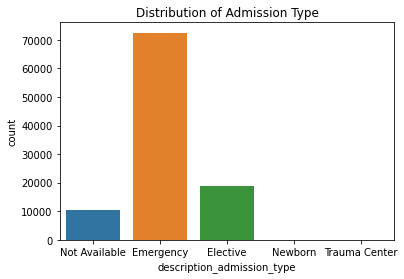

In [32]:
sns.countplot(x = "description_admission_type", data = df_data)
plt.title("Distribution of Admission Type")
plt.show()

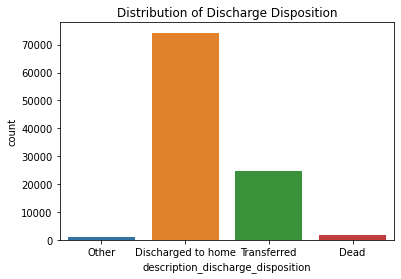

In [33]:
sns.countplot(x = "description_discharge_disposition", data = df_data)
plt.title("Distribution of Discharge Disposition")
plt.show()

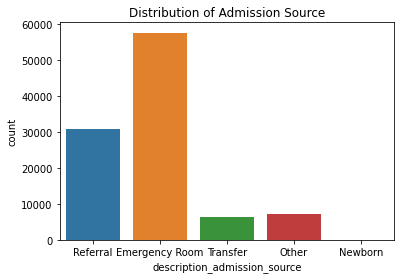

In [34]:
sns.countplot(x = "description_admission_source", data = df_data)
plt.title("Distribution of Admission Source")
plt.show()

The admission type with more prevalence is emergency, the discharge disposition is discharged to home, and the admission source is emergency room.

### **Exploring the output column `readmitted`**

Now lets take a look to the output column  `readmitted`

In [35]:
df_data.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [36]:
df_data.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

We can convert the categories into 2 types: 1 for readmission and 0 for No readmission.

In [37]:
df_data['readmitted'] = df_data['readmitted'].replace({'>30':1,'<30':1,'NO':0})

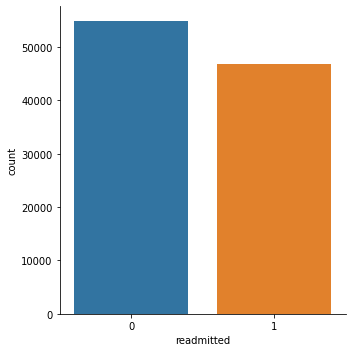

In [38]:
sns.catplot(x='readmitted', data=df_data, kind='count')

In [39]:
df_data.corr()[['readmitted']].style.background_gradient(cmap='coolwarm')

,readmitted
patient_nbr,0.0740926
time_in_hospital,0.0512889
num_lab_procedures,0.0392531
num_procedures,-0.0447478
num_medications,0.0467721
number_outpatient,0.0821416
number_emergency,0.103011
number_inpatient,0.217194
number_diagnoses,0.112564
readmitted,1


The reamitted data column is inversely correlated with features admission_type_id, discharge_disposition_id, and num_procedures.

### **Analysis of numerical and catagorical variables**

In [40]:
df_data_num = df_data.select_dtypes([np.number])
df_data_num.sample(3)

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
55283,77173911,4,53,2,28,0,0,0,6,0
4565,613278,1,37,0,6,0,0,0,7,1
47682,93175947,7,53,0,21,1,0,0,9,1


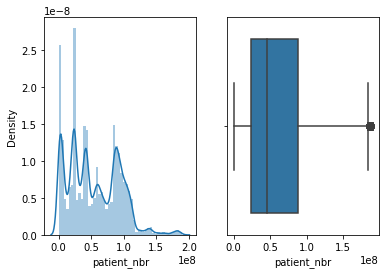

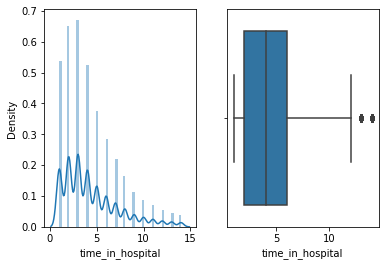

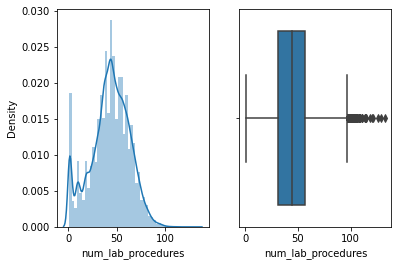

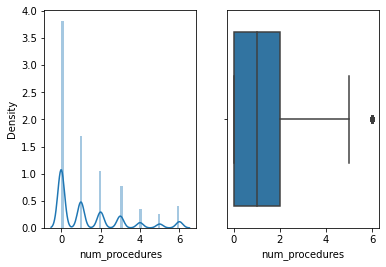

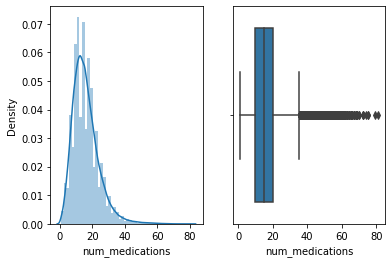

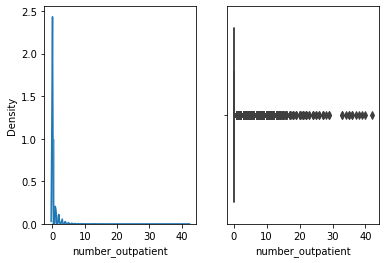

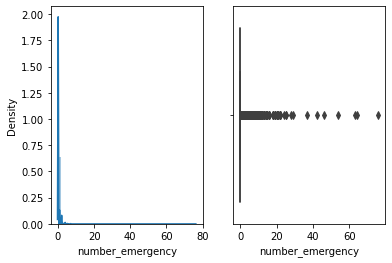

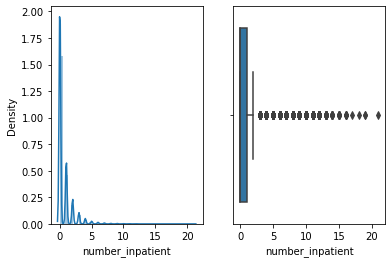

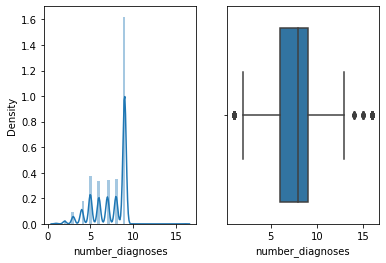

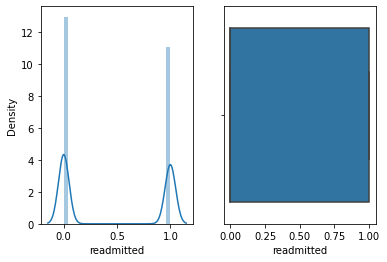

In [41]:
for i, col in enumerate(df_data_num.columns):
    plt.figure(i)
    plt.subplot(121)
    sns.distplot(df_data_num[col])

    plt.subplot(122)
    sns.boxplot(df_data_num[col])

In [42]:
df_data_cat = df_data.select_dtypes(['object'])
df_data_cat.sample(3)

,race,gender,age,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,description_admission_type,description_discharge_disposition,description_admission_source
49992,Caucasian,Male,[80-90),None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,Emergency,Discharged to home,Emergency Room
41225,AfricanAmerican,Female,[40-50),None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,Emergency,Transferred,Referral
26441,AfricanAmerican,Female,[70-80),None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Emergency,Transferred,Emergency Room


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

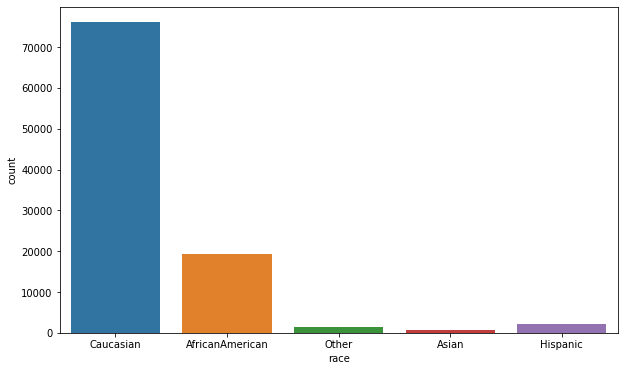

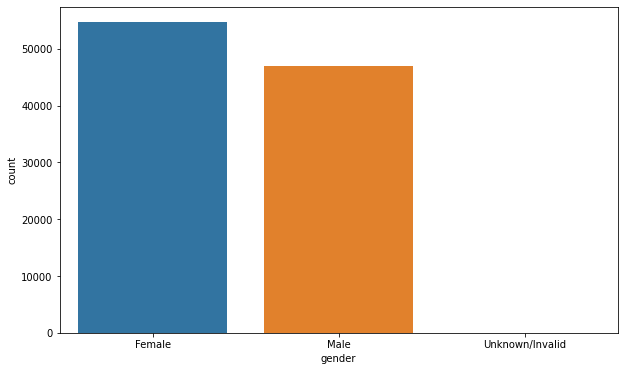

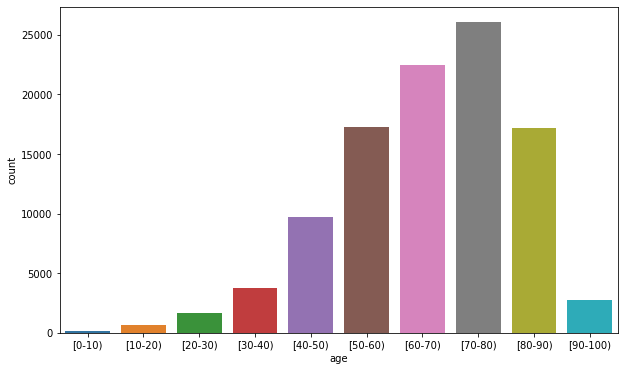

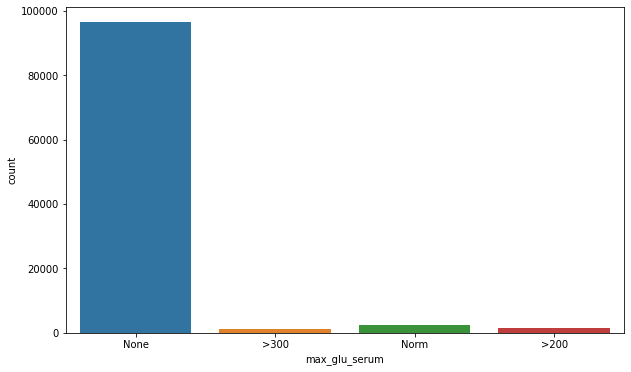

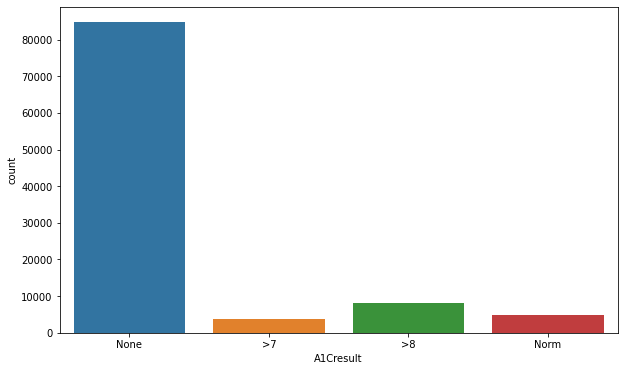

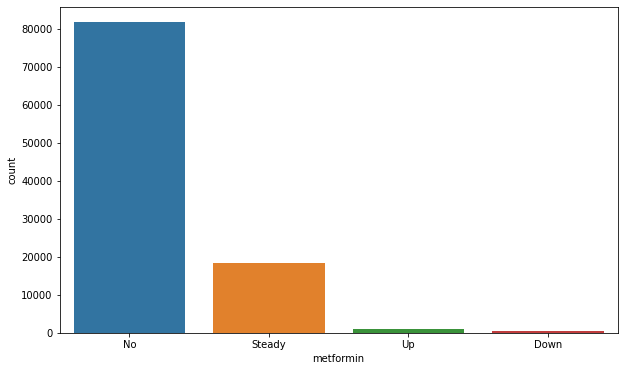

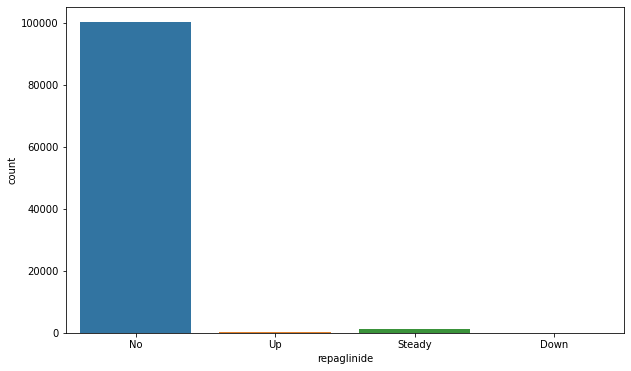

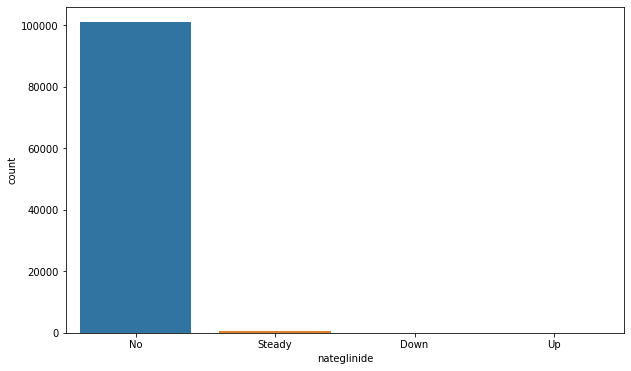

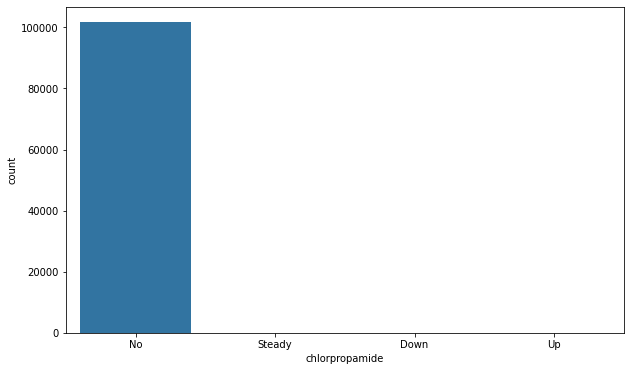

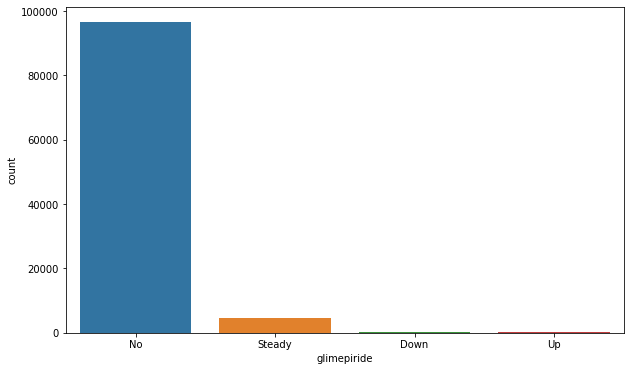

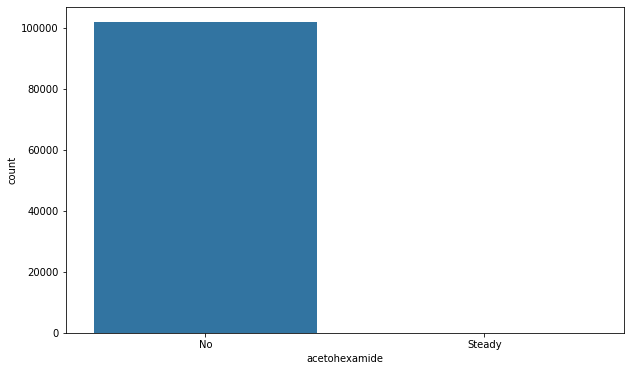

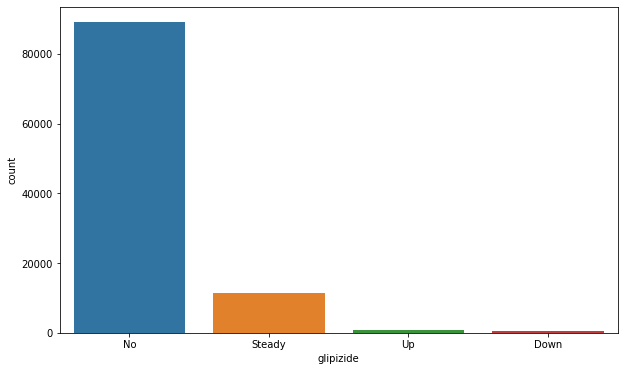

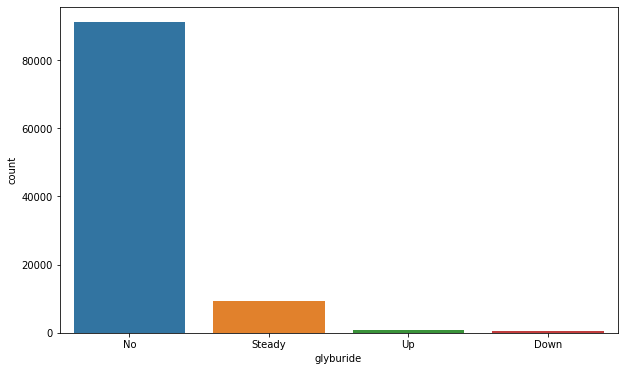

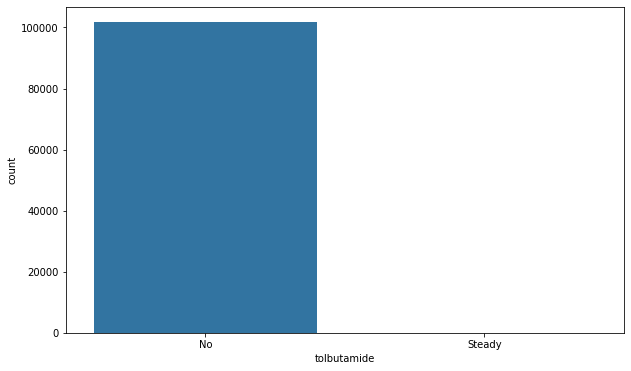

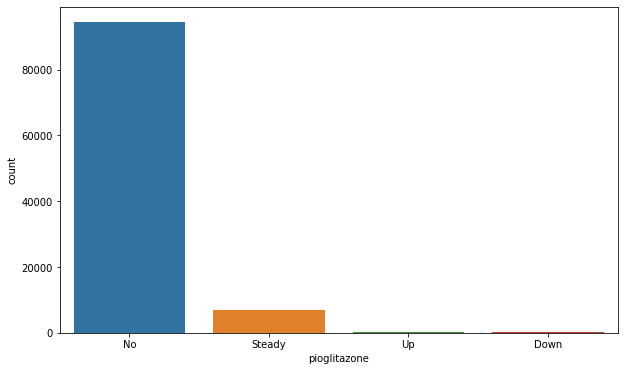

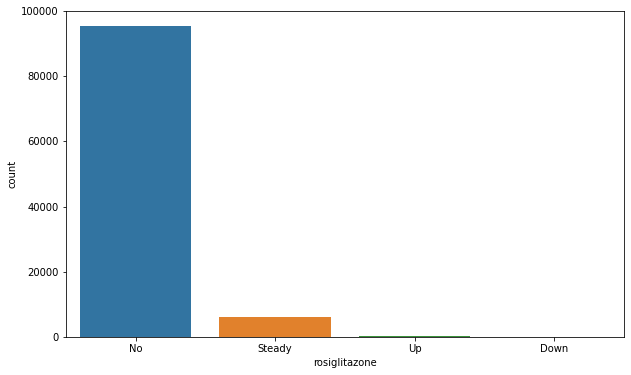

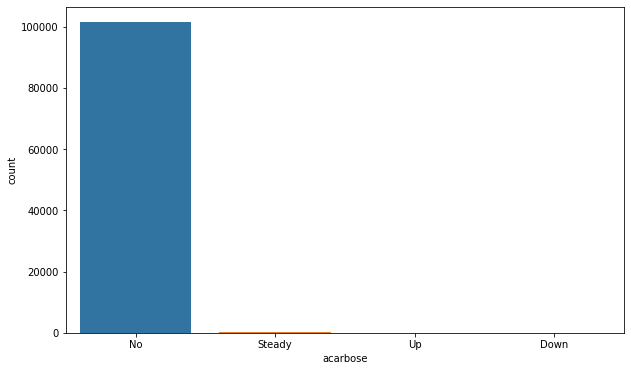

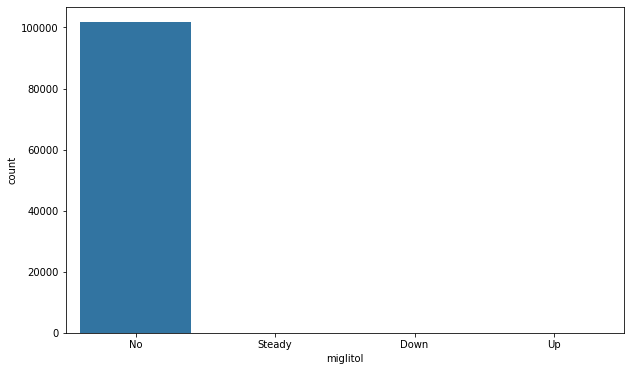

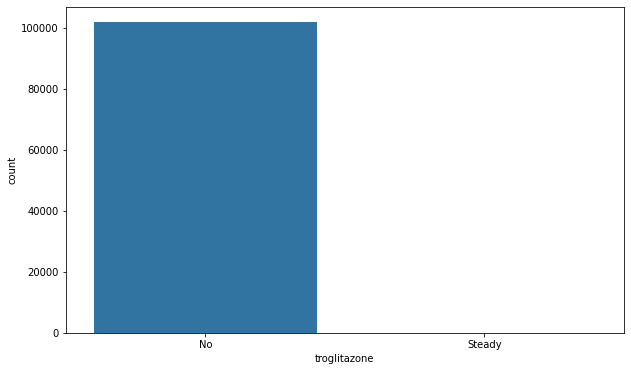

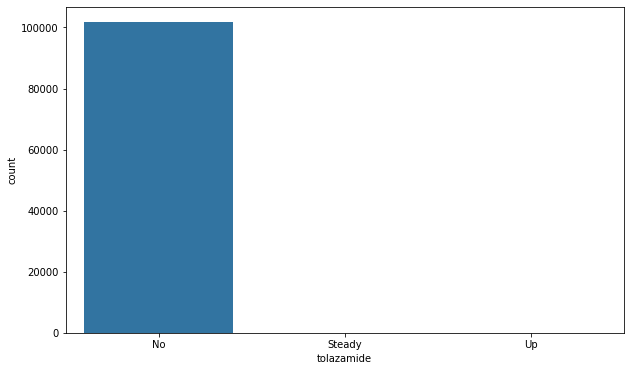

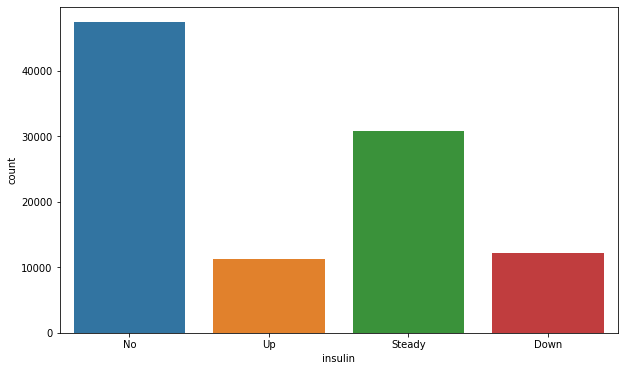

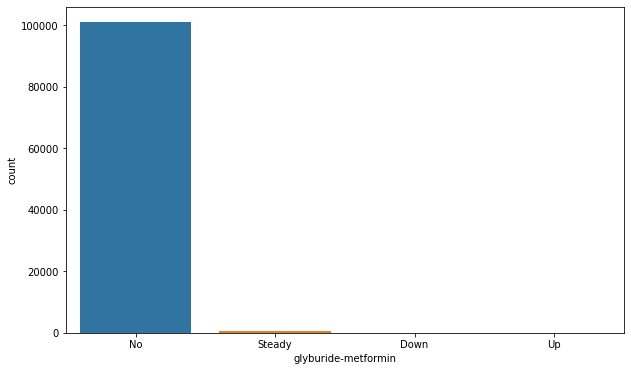

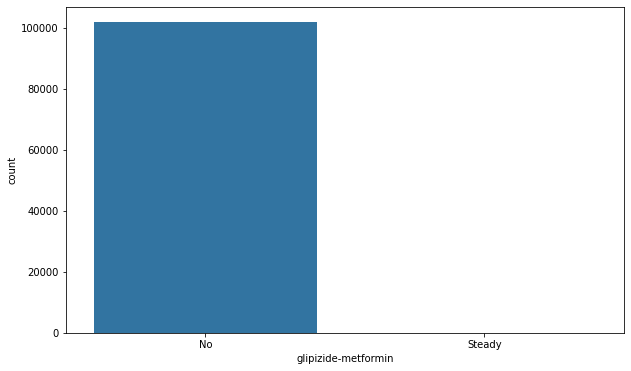

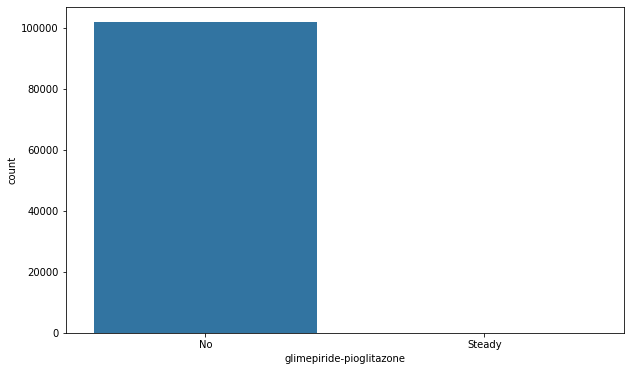

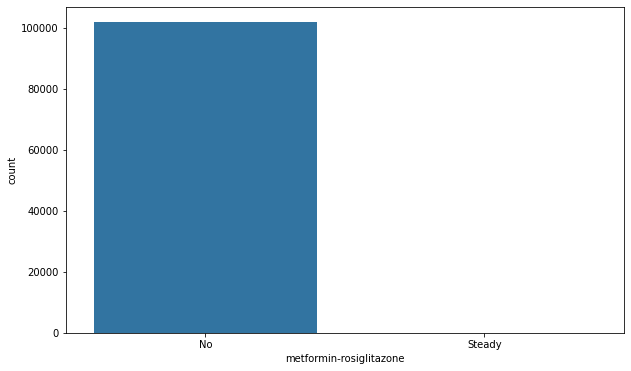

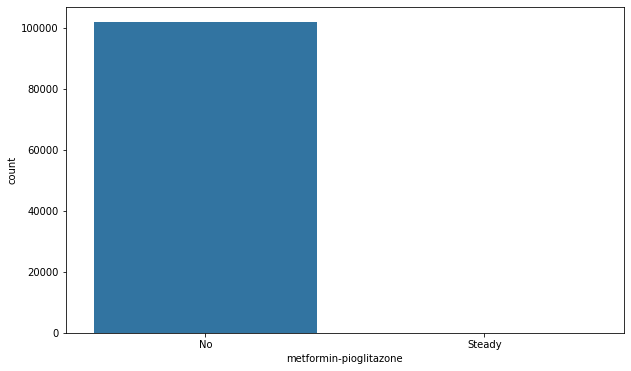

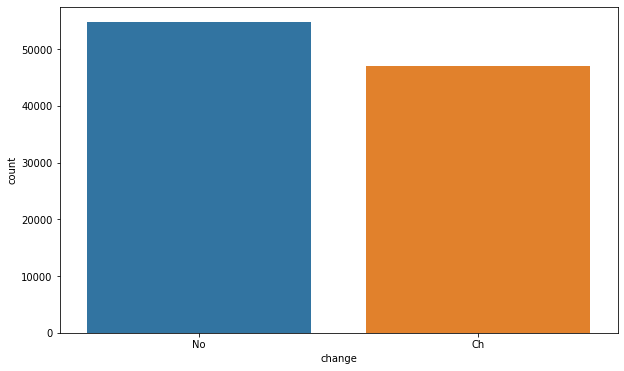

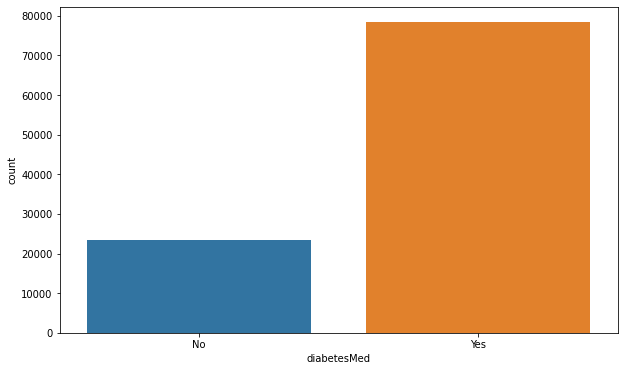

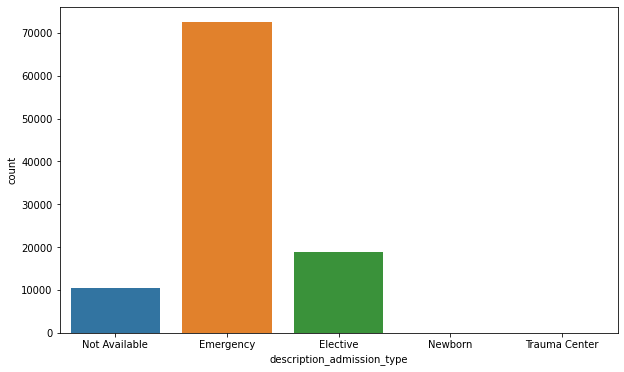

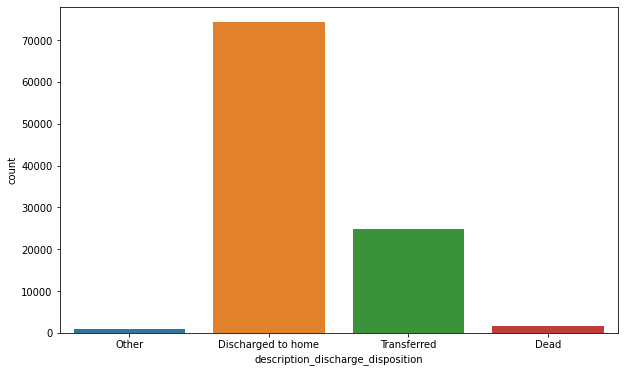

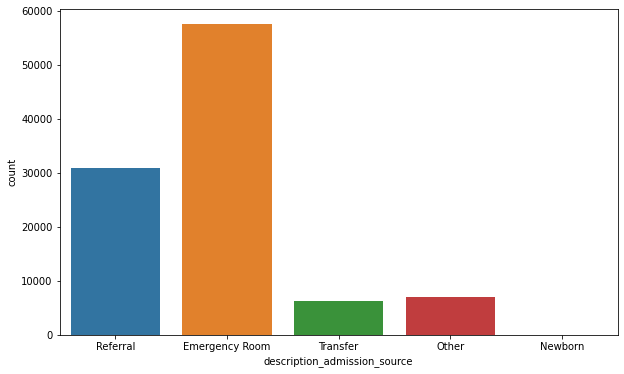

In [43]:
for i, col in enumerate(df_data_cat.columns):
    plt.figure(i, figsize=(10,6))
    sns.countplot(df_data_cat[col])

According to the visual inspection there are some interesting features to explore:
* race
* gender


In [44]:
df_data['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [45]:
df_data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [46]:
df_data['gender'] = df_data['gender'].replace('Unknown/Invalid','Female')

In [47]:
df_grouped = df_data.groupby(['race', 'gender'])['readmitted'].count()
df_grouped

race             gender
AfricanAmerican  Female    11728
                 Male       7482
Asian            Female      318
                 Male        323
Caucasian        Female    39689
                 Male      36410
Hispanic         Female     1092
                 Male        945
Other            Female      749
                 Male        757
Name: readmitted, dtype: int64

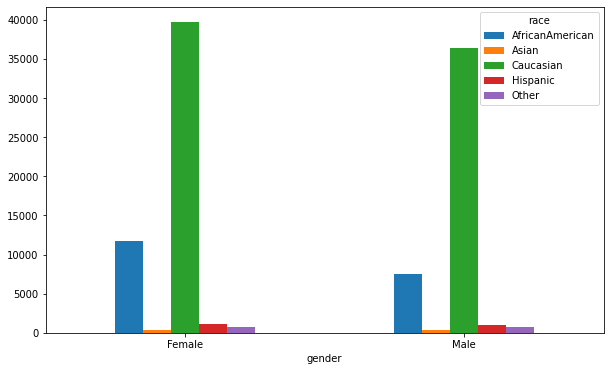

In [48]:
df_grouped.unstack(0).plot.bar(figsize=(10,6))
plt.xticks(rotation=0)
plt.show()

As we can see the most of the pacients are caucasian for both genders.

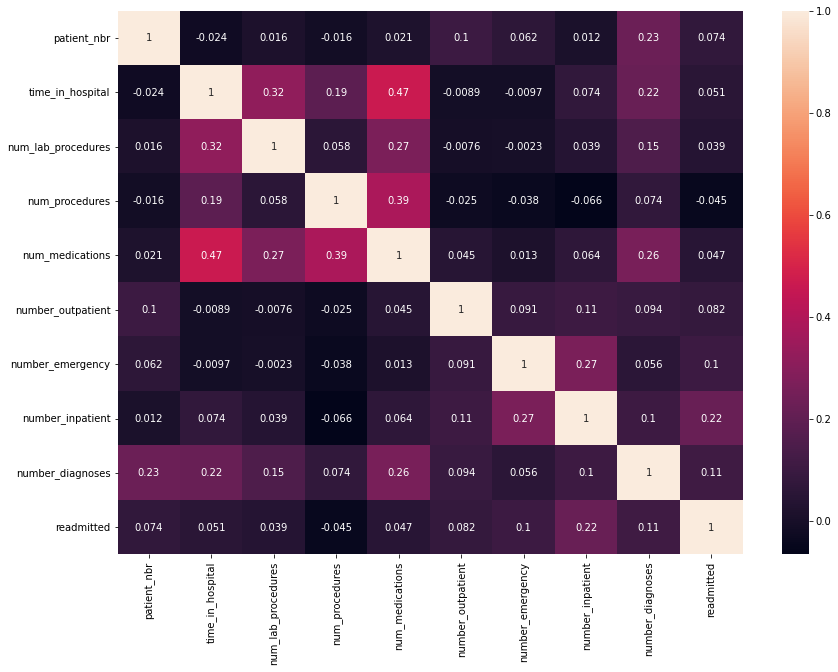

In [49]:
plt.figure(figsize=(14,10))
sns.heatmap(df_data.corr(), annot = True)

## **3. Classification**

### **Preparing data**

In [50]:
df_data.head()

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description_admission_type,description_discharge_disposition,description_admission_source
0,8222157,Caucasian,Female,[0-10),1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,Not Available,Other,Referral
1,55629189,Caucasian,Female,[10-20),3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,Emergency,Discharged to home,Emergency Room
2,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,Emergency,Discharged to home,Emergency Room
3,82442376,Caucasian,Male,[30-40),2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,Emergency,Discharged to home,Emergency Room
4,42519267,Caucasian,Male,[40-50),1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Emergency,Discharged to home,Emergency Room


Before to star we need to convert the values on the age column. Let’s use the average value for each range.

In [51]:
df_data['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [52]:
df_data['age'] = df_data['age'].replace({'[70-80)': 75, '[60-70)': 65, '[50-60)': 55, '[80-90)': 85, '[40-50)': 45, '[30-40)': 35, '[90-100)': 95, '[20-30)': 25, '[10-20)': 15, '[0-10)': 5})

In [53]:
df_data[['age']].sample(5)

,age
72537,85
14617,45
36493,75
40523,85
27313,45


Now we are going to aggreagte de number of pacients in one column and remove unnecessary data.

In [54]:
df_data['number_patients'] = df_data['number_outpatient'] + df_data['number_inpatient']
df_data.drop(['number_outpatient', 'number_inpatient'], axis = 1, inplace = True)

In [55]:
df_data.sample(3)

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description_admission_type,description_discharge_disposition,description_admission_source,number_patients
51644,52840206,Caucasian,Male,55,8,72,0,14,0,9,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,Not Available,Transferred,Referral,1
76348,90508257,Caucasian,Male,25,1,43,0,6,0,5,None,>8,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,1,Emergency,Discharged to home,Emergency Room,0
61544,104648508,AfricanAmerican,Male,55,1,55,0,8,0,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1,Emergency,Discharged to home,Referral,1


For this exercise we are going to use some of the features on the data.

In [56]:
list_columns = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride','acetohexamide', 'glipizide', 
                'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                'tolazamide', 'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone',
                'metformin-rosiglitazone','metformin-pioglitazone', 'insulin']

In [57]:
df_data.drop(list_columns, axis=1, inplace=True)

In [58]:
df_data.head()

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,description_admission_type,description_discharge_disposition,description_admission_source,number_patients
0,8222157,Caucasian,Female,5,1,41,0,1,0,1,None,None,No,No,0,Not Available,Other,Referral,0
1,55629189,Caucasian,Female,15,3,59,0,18,0,9,None,None,Ch,Yes,1,Emergency,Discharged to home,Emergency Room,0
2,86047875,AfricanAmerican,Female,25,2,11,5,13,0,6,None,None,No,Yes,0,Emergency,Discharged to home,Emergency Room,3
3,82442376,Caucasian,Male,35,2,44,1,16,0,7,None,None,Ch,Yes,0,Emergency,Discharged to home,Emergency Room,0
4,42519267,Caucasian,Male,45,1,51,0,8,0,5,None,None,Ch,Yes,0,Emergency,Discharged to home,Emergency Room,0


Changing categorical values for 1 or 0.

In [59]:
df_data['change'] = df_data['change'].replace("No", 0).replace("Ch", 1)
df_data['diabetesMed'] = df_data['diabetesMed'].replace("No", 0).replace("Yes", 1)

In [60]:
df_data['A1Cresult'] = df_data['A1Cresult'].replace(">7", 1).replace(">8", 1).replace("None", 0).replace("Norm", 2)
df_data['max_glu_serum'] = df_data['max_glu_serum'].replace(">200", 1).replace(">300", 1).replace("None", 0).replace("Norm", 2)

In [61]:
df_data.dropna(inplace=True)

In [62]:
df_data.head()

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,description_admission_type,description_discharge_disposition,description_admission_source,number_patients
0,8222157,Caucasian,Female,5,1,41,0,1,0,1,0,0,0,0,0,Not Available,Other,Referral,0
1,55629189,Caucasian,Female,15,3,59,0,18,0,9,0,0,1,1,1,Emergency,Discharged to home,Emergency Room,0
2,86047875,AfricanAmerican,Female,25,2,11,5,13,0,6,0,0,0,1,0,Emergency,Discharged to home,Emergency Room,3
3,82442376,Caucasian,Male,35,2,44,1,16,0,7,0,0,1,1,0,Emergency,Discharged to home,Emergency Room,0
4,42519267,Caucasian,Male,45,1,51,0,8,0,5,0,0,1,1,0,Emergency,Discharged to home,Emergency Room,0


### **Clustering**

In [63]:
df_data_norm = df_data.copy()

In [64]:
df_data.select_dtypes([np.object]).columns

Index(['race', 'gender', 'description_admission_type',
       'description_discharge_disposition', 'description_admission_source'],
      dtype='object')

In [65]:
df_data_norm = pd.get_dummies(df_data_norm, columns=['race', 'gender', 'description_admission_type',
       'description_discharge_disposition', 'description_admission_source'])

In [66]:
df_data_norm.head()

,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,number_patients,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,description_admission_type_Elective,description_admission_type_Emergency,description_admission_type_Newborn,description_admission_type_Not Available,description_admission_type_Trauma Center,description_discharge_disposition_Dead,description_discharge_disposition_Discharged to home,description_discharge_disposition_Other,description_discharge_disposition_Transferred,description_admission_source_Emergency Room,description_admission_source_Newborn,description_admission_source_Other,description_admission_source_Referral,description_admission_source_Transfer
0,8222157,5,1,41,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,55629189,15,3,59,0,18,0,9,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,86047875,25,2,11,5,13,0,6,0,0,0,1,0,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,82442376,35,2,44,1,16,0,7,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,42519267,45,1,51,0,8,0,5,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [67]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(2)
clusters = kmeans.fit_predict(df_data_norm)
labels = pd.DataFrame(clusters)
labeledData = pd.concat((df_data,labels),axis=1)
labeledData = labeledData.rename({0:'labels'},axis=1)

In [69]:
labeledData.head()

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,description_admission_type,description_discharge_disposition,description_admission_source,number_patients,labels
0,8222157.0,Caucasian,Female,5.0,1.0,41.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Not Available,Other,Referral,0.0,1.0
1,55629189.0,Caucasian,Female,15.0,3.0,59.0,0.0,18.0,0.0,9.0,0.0,0.0,1.0,1.0,1.0,Emergency,Discharged to home,Emergency Room,0.0,1.0
2,86047875.0,AfricanAmerican,Female,25.0,2.0,11.0,5.0,13.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,Emergency,Discharged to home,Emergency Room,3.0,0.0
3,82442376.0,Caucasian,Male,35.0,2.0,44.0,1.0,16.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,Emergency,Discharged to home,Emergency Room,0.0,0.0
4,42519267.0,Caucasian,Male,45.0,1.0,51.0,0.0,8.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,Emergency,Discharged to home,Emergency Room,0.0,1.0


## **4. Conclusion**

We looked for different exploratory data analysis and a cluster technique for categorical and numerical data in the diabetes dataset.